In [ ]:
#당뇨병 수치 예측

In [3]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [4]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [5]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [7]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [8]:
def model(X, W, b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [9]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [10]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [11]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [12]:
LEARNING_RATE = 0.01

In [15]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 30001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3092.6353
Iteration 200 : Loss 3090.8466
Iteration 300 : Loss 3089.0763
Iteration 400 : Loss 3087.3242
Iteration 500 : Loss 3085.5900
Iteration 600 : Loss 3083.8736
Iteration 700 : Loss 3082.1748
Iteration 800 : Loss 3080.4933
Iteration 900 : Loss 3078.8288
Iteration 1000 : Loss 3077.1813
Iteration 1100 : Loss 3075.5505
Iteration 1200 : Loss 3073.9362
Iteration 1300 : Loss 3072.3382
Iteration 1400 : Loss 3070.7563
Iteration 1500 : Loss 3069.1903
Iteration 1600 : Loss 3067.6400
Iteration 1700 : Loss 3066.1053
Iteration 1800 : Loss 3064.5860
Iteration 1900 : Loss 3063.0818
Iteration 2000 : Loss 3061.5927
Iteration 2100 : Loss 3060.1184
Iteration 2200 : Loss 3058.6588
Iteration 2300 : Loss 3057.2136
Iteration 2400 : Loss 3055.7829
Iteration 2500 : Loss 3054.3662
Iteration 2600 : Loss 3052.9636
Iteration 2700 : Loss 3051.5748
Iteration 2800 : Loss 3050.1998
Iteration 2900 : Loss 3048.8382
Iteration 3000 : Loss 3047.4901
Iteration 3100 : Loss 3046.1552
Iteration 3200 : 

In [16]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2867.0831832060735)

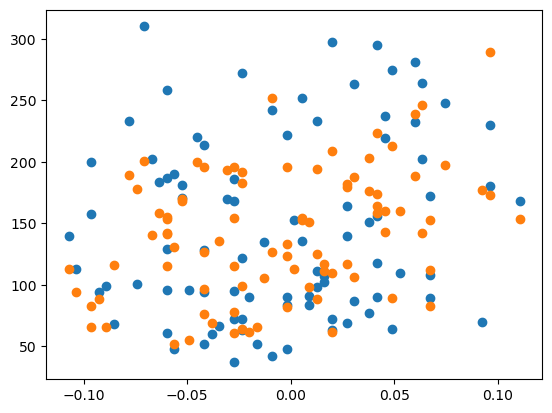

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [ ]:
# 자전거 수요 에측

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

In [3]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble      import RandomForestRegressor
from sklearn.metrics       import mean_squared_error

# 2) X, y 분리
#    — datetime, casual, registered, count는 feature에서 제외
X = train.drop(columns=['datetime', 'casual', 'registered', 'count'])
y = train['count']

# 3) train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 4) 모델 정의 & 학습
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 5) 예측 & 평가
y_pred = model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


MSE:  1798.638
RMSE: 42.410


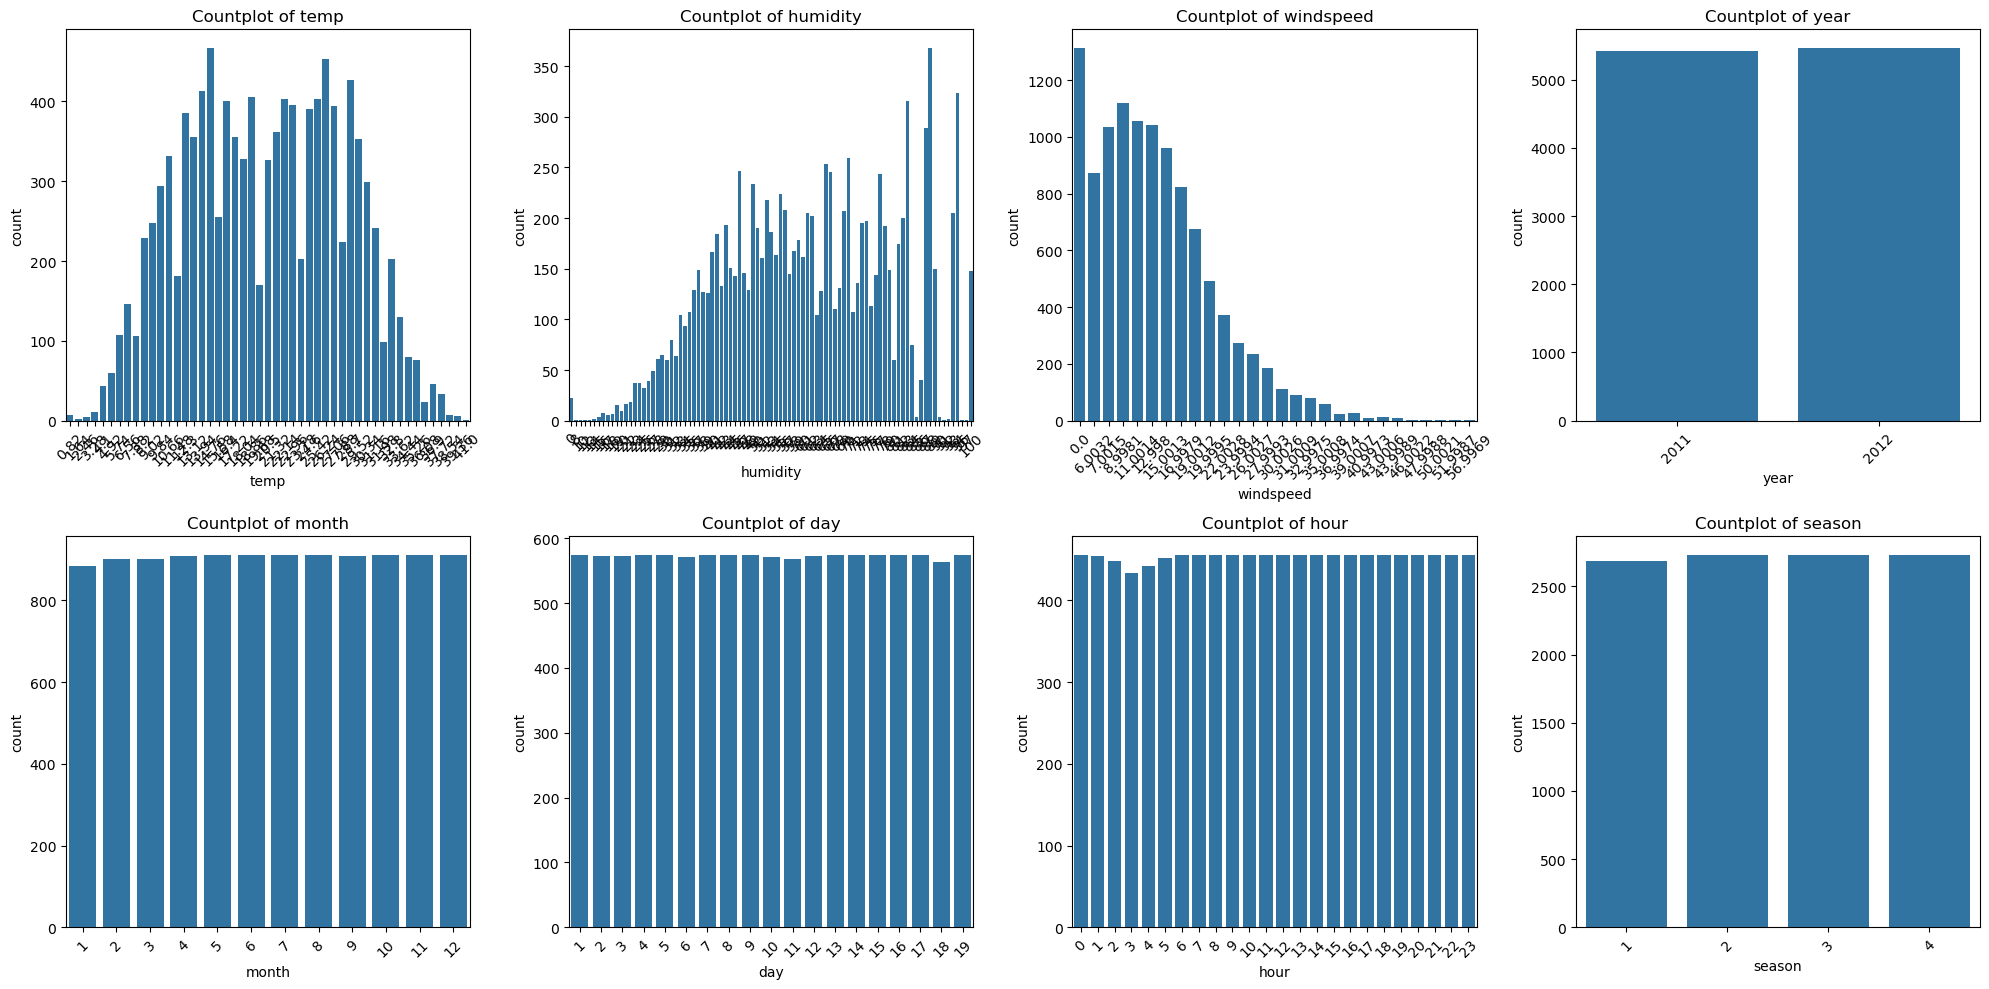

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2행 × 4열 그리드
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# EDA할 컬럼 리스트 (drop한 컬럼들은 제외)
cols = [
    'temp',     # 기온
    'humidity', # 습도
    'windspeed',# 풍속
    'year',     # datetime에서 추출
    'month',    # datetime에서 추출
    'day',      # datetime에서 추출
    'hour',     # datetime에서 추출
    'season'    # 원-핫 대신 수치로 들어있는 계절
]

for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
    ax.tick_params(axis='x', rotation=45)  # x축 라벨이 겹치면 회전

plt.tight_layout()
plt.show()


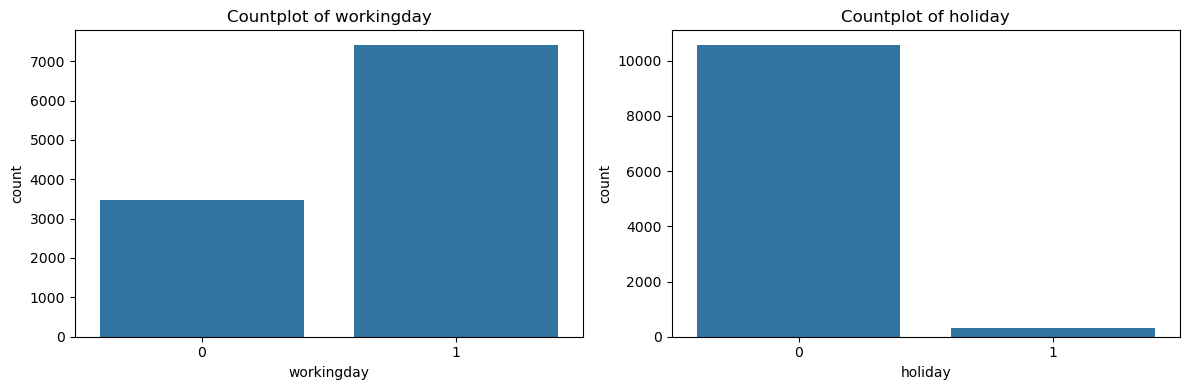

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for ax, col in zip(axs, ['workingday','holiday']):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()


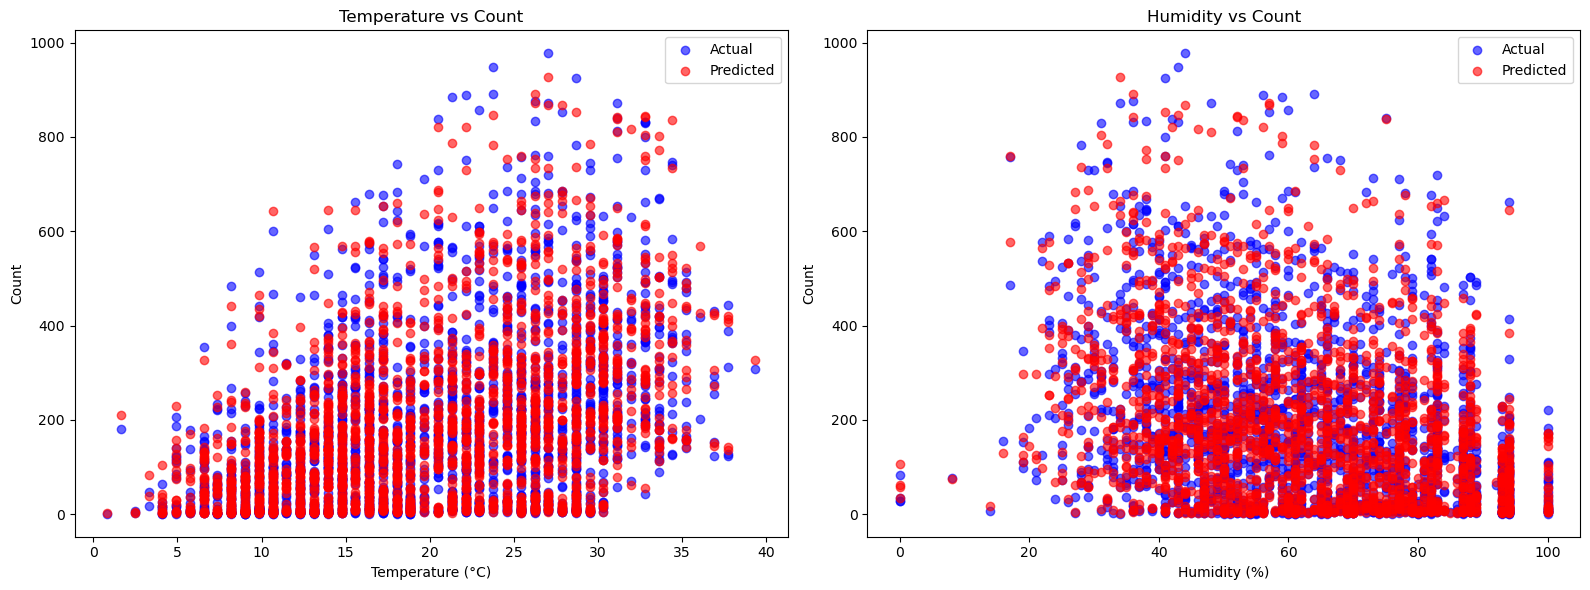

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# 1) Temperature vs Count
axs[0].scatter(
    X_test['temp'], y_test,
    color='blue', label='Actual', alpha=0.6
)
axs[0].scatter(
    X_test['temp'], y_pred,
    color='red', label='Predicted', alpha=0.6
)
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# 2) Humidity vs Count
axs[1].scatter(
    X_test['humidity'], y_test,
    color='blue', label='Actual', alpha=0.6
)
axs[1].scatter(
    X_test['humidity'], y_pred,
    color='red', label='Predicted', alpha=0.6
)
axs[1].set_xlabel('Humidity (%)')
axs[1].set_ylabel('Count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

plt.tight_layout()  # 서브플롯 간격 자동 조정
plt.show()          # 그래프 출력

# --- 그래프 이후에 통계 요약 ---
print(train['count'].describe())


In [9]:
print(train['count'].describe())


count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64
